In [1]:
import os, sys, math
sys.path.insert(0, '../../FISH-annotation/Annotation')
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
import util
import numpy as np
import pandas as pd

In [2]:
num_spots_list = np.arange(50, 250, 25)
cwd = os.getcwd()

------------------------ snr_10_numspots_50_spot_img.png ------------------------


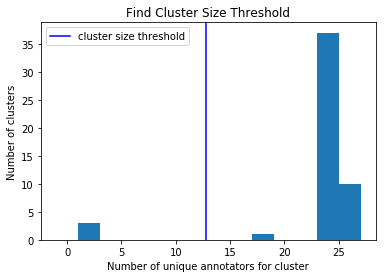

<Figure size 864x504 with 0 Axes>

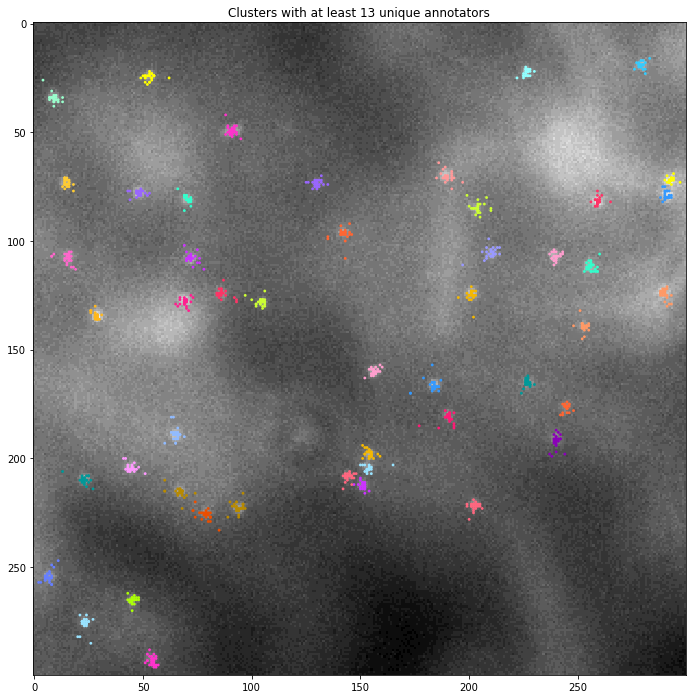

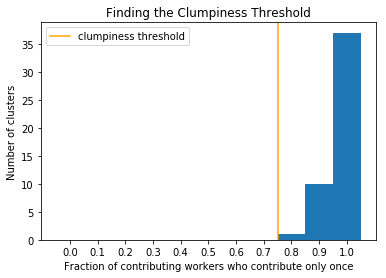

<Figure size 864x504 with 0 Axes>

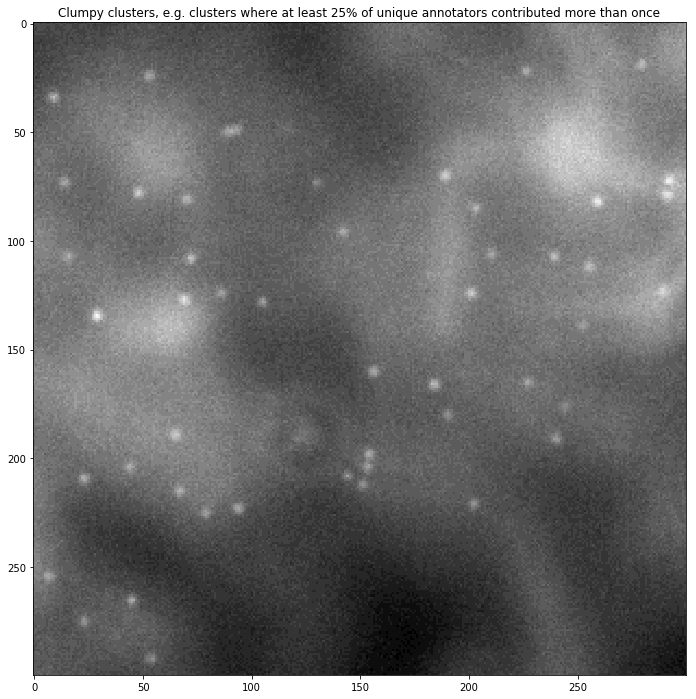

<Figure size 864x504 with 0 Axes>

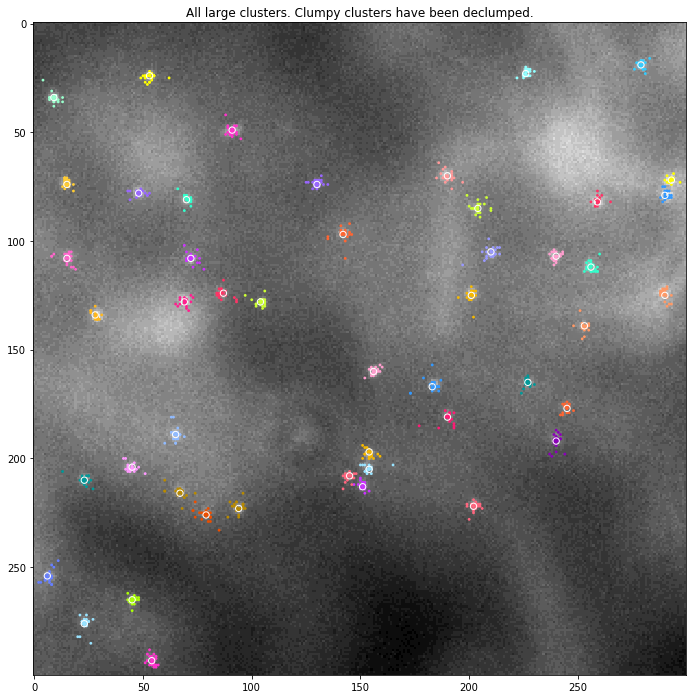

<Figure size 864x504 with 0 Axes>

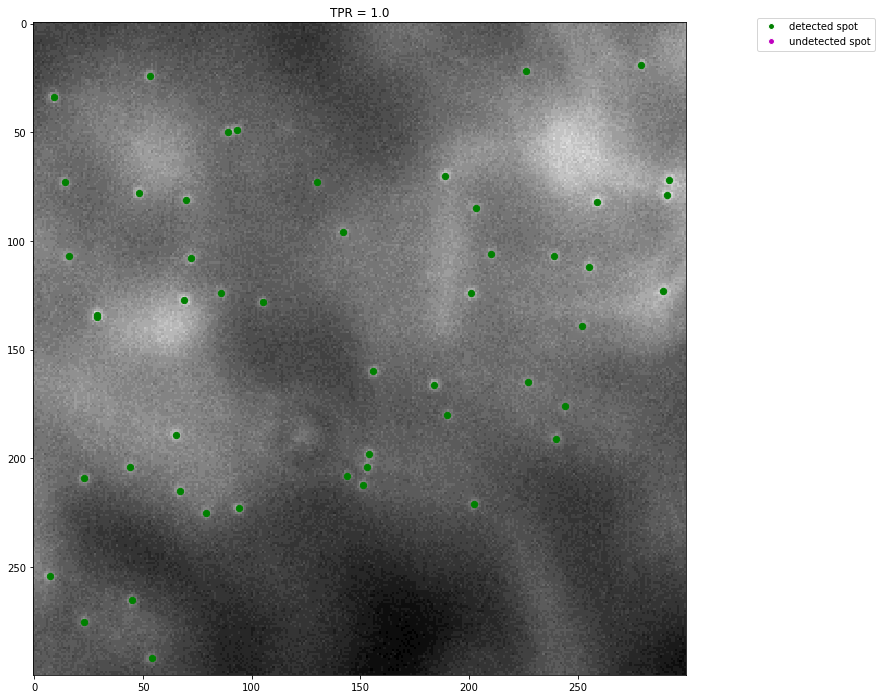

<Figure size 864x504 with 0 Axes>

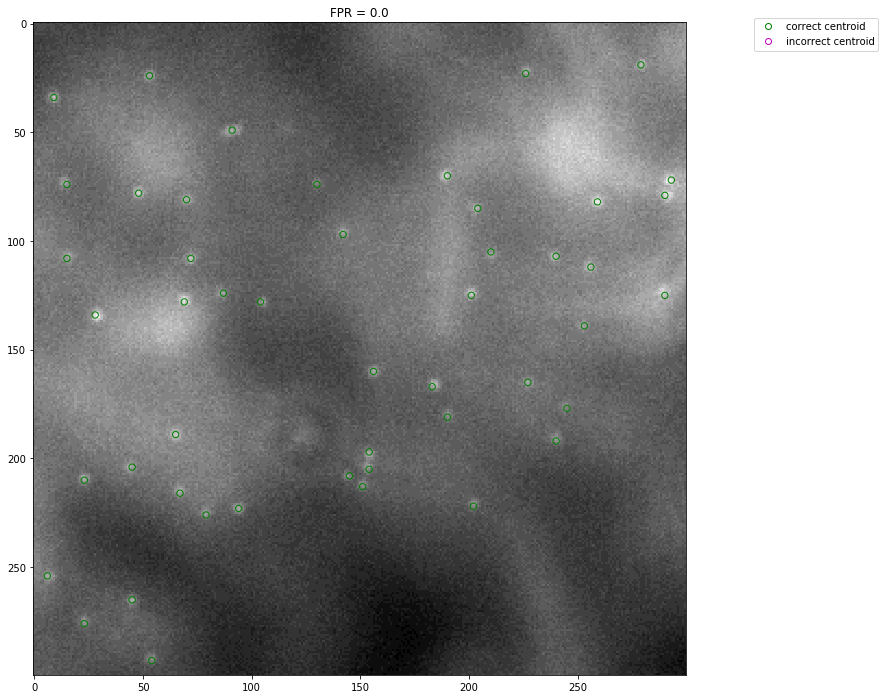

TPR: 1.0
FPR: 0.0
------------------------ snr_10_numspots_75_spot_img.png ------------------------


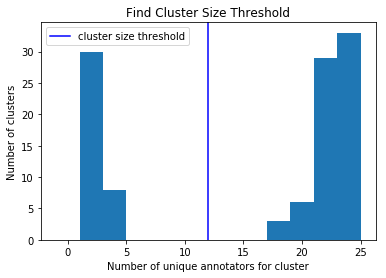

<Figure size 864x504 with 0 Axes>

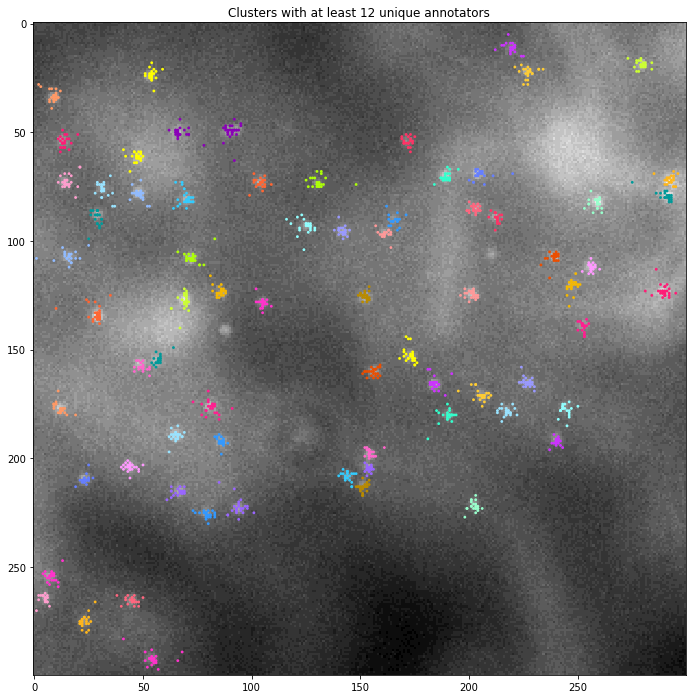

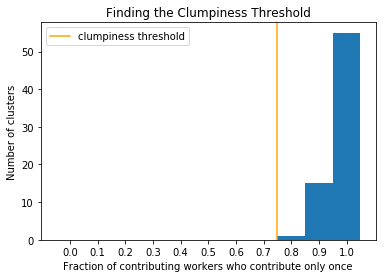

<Figure size 864x504 with 0 Axes>

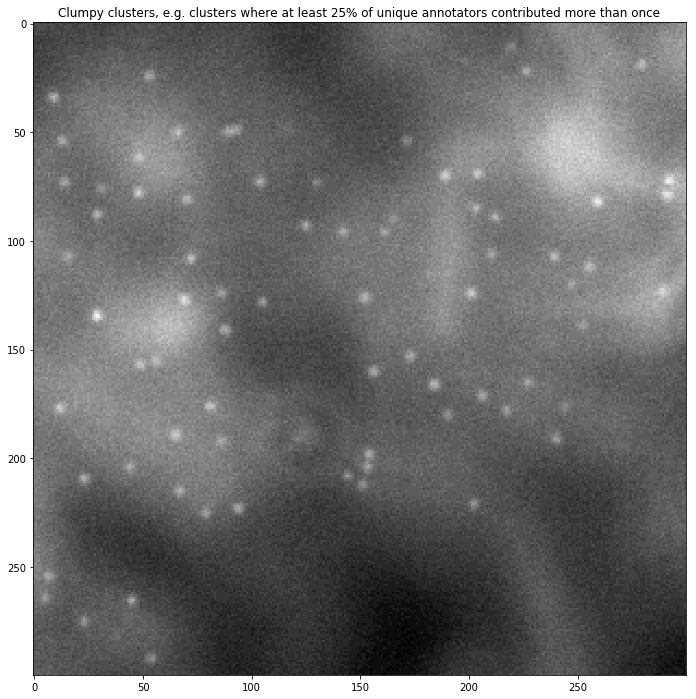

<Figure size 864x504 with 0 Axes>

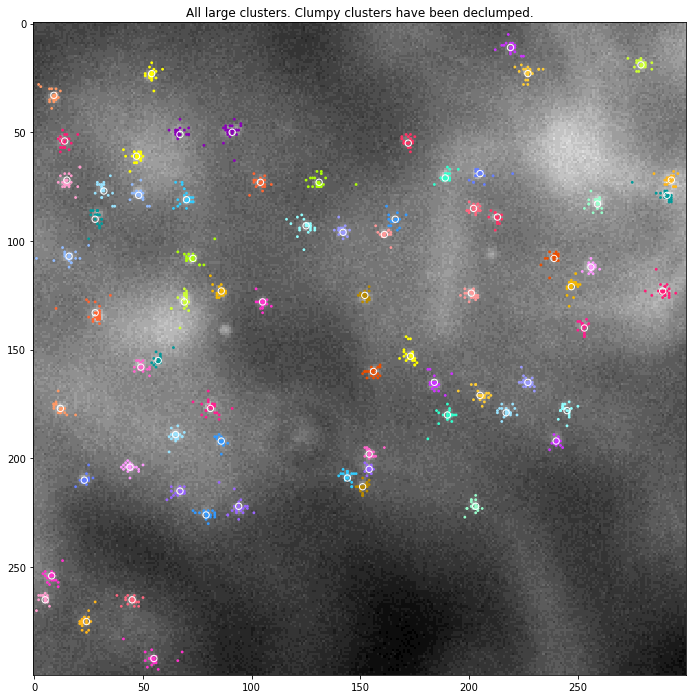

<Figure size 864x504 with 0 Axes>

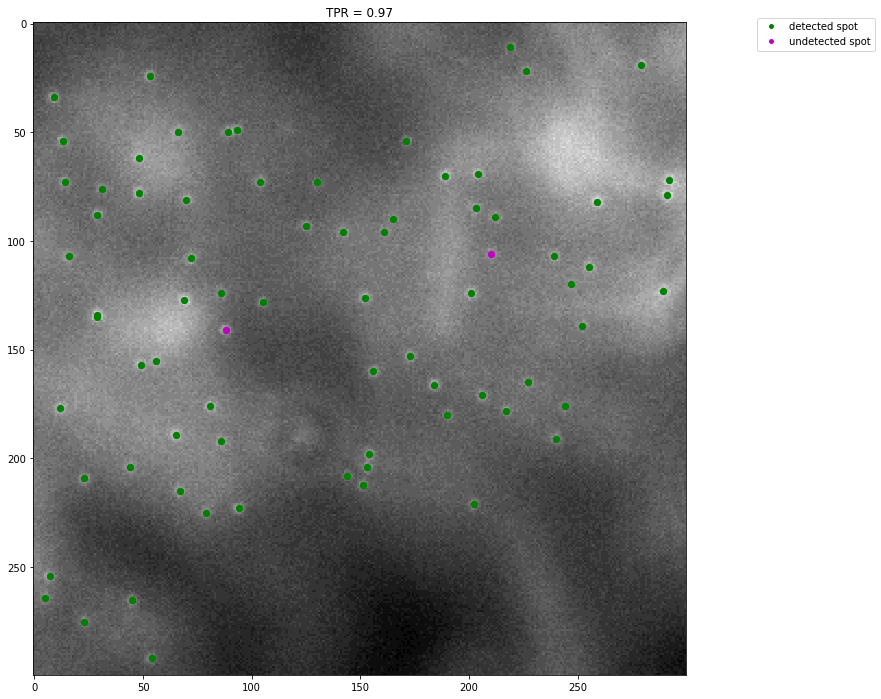

<Figure size 864x504 with 0 Axes>

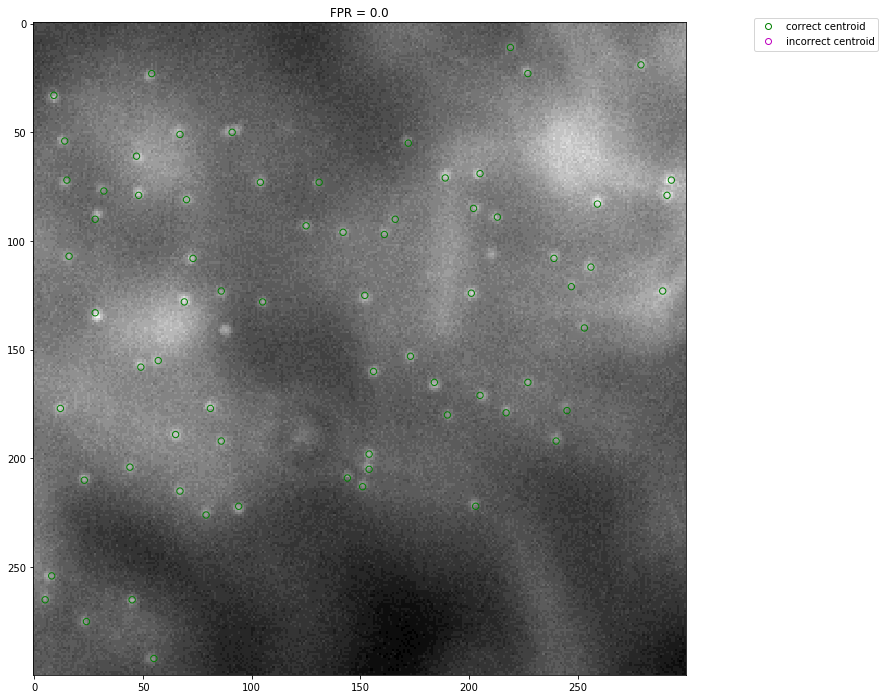

TPR: 0.97
FPR: 0.0
------------------------ snr_10_numspots_100_spot_img.png ------------------------


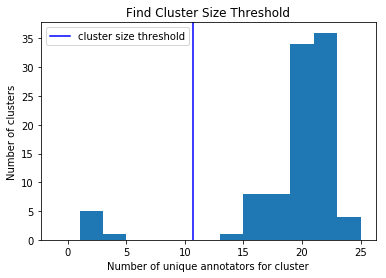

<Figure size 864x504 with 0 Axes>

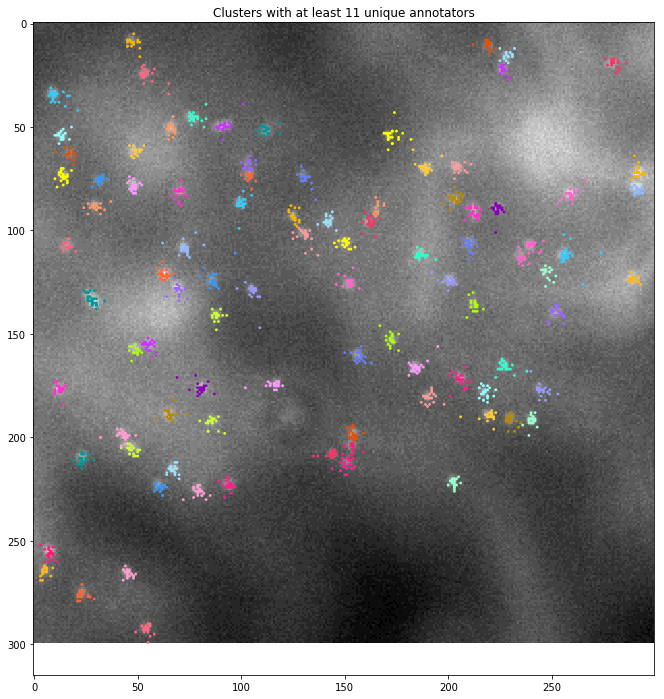

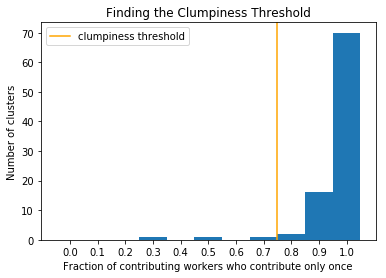

<Figure size 864x504 with 0 Axes>

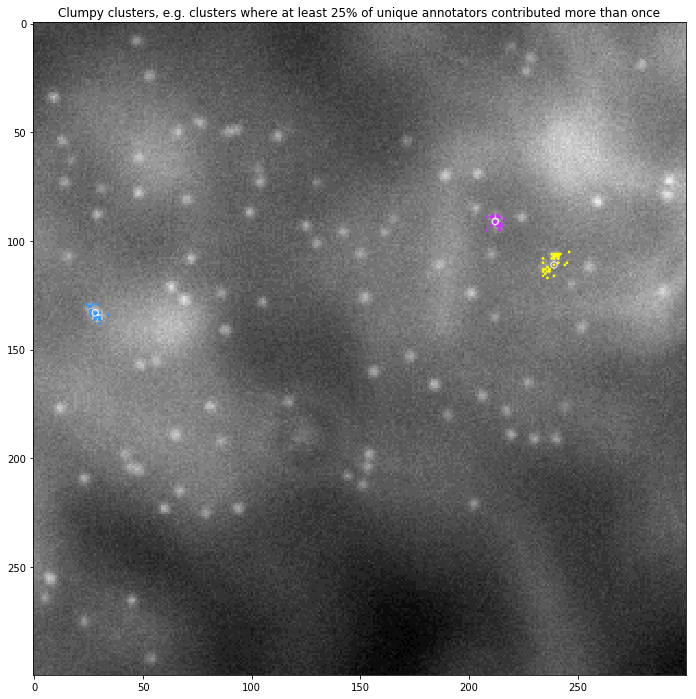

<Figure size 864x504 with 0 Axes>

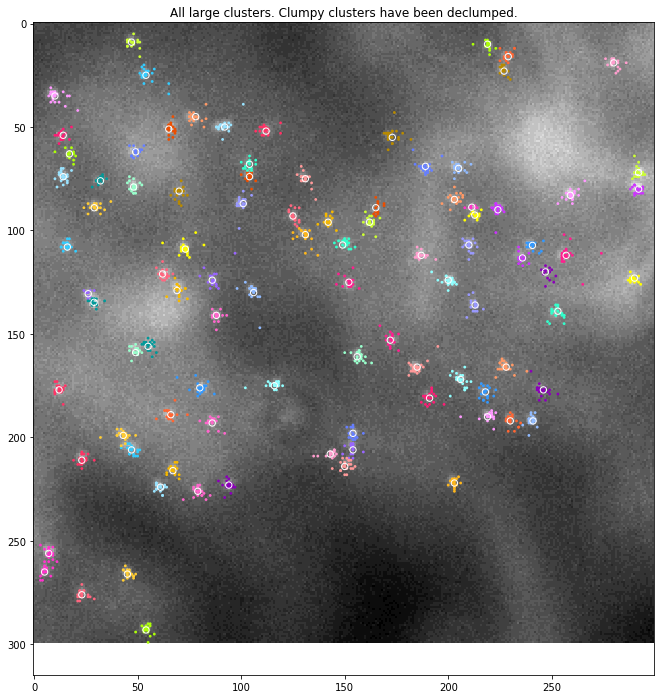

<Figure size 864x504 with 0 Axes>

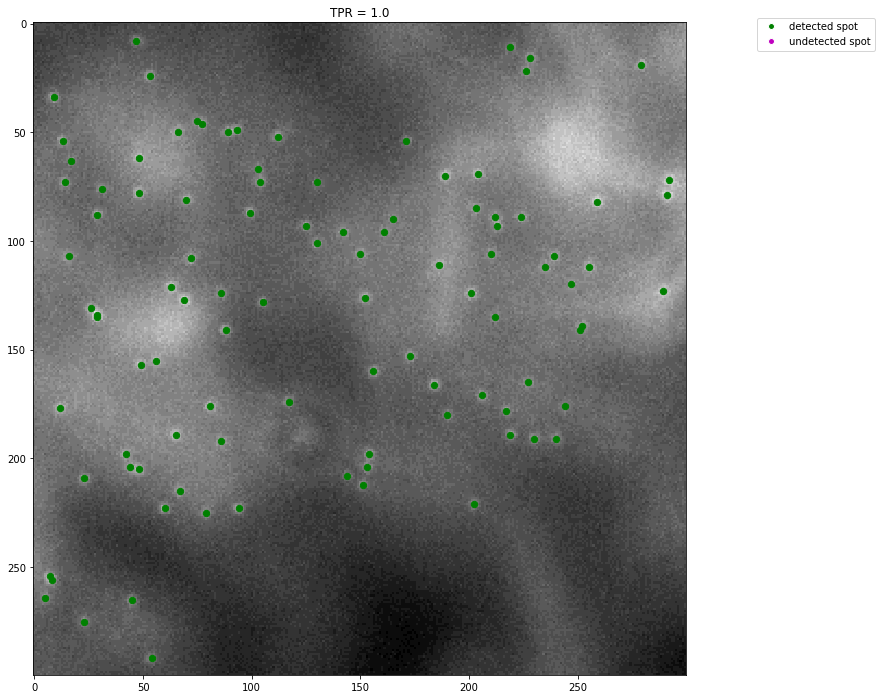

<Figure size 864x504 with 0 Axes>

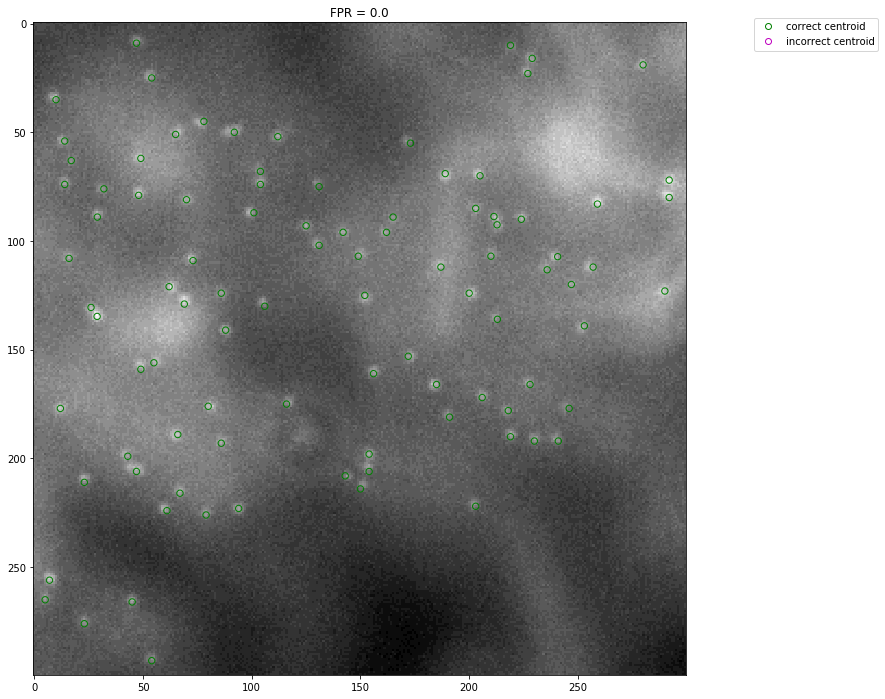

TPR: 1.0
FPR: 0.0
------------------------ snr_10_numspots_125_spot_img.png ------------------------


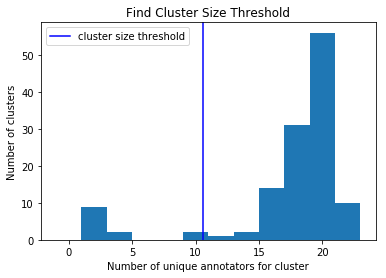

<Figure size 864x504 with 0 Axes>

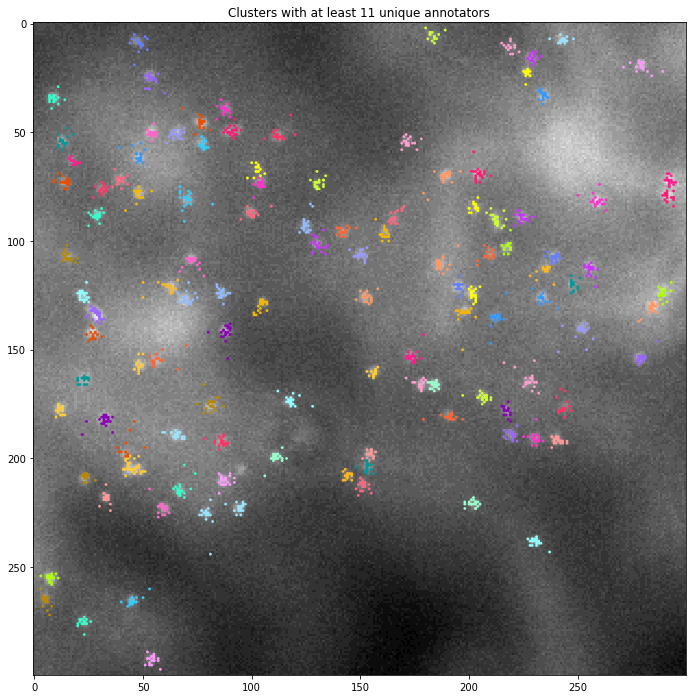

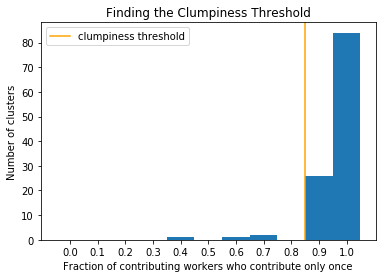

<Figure size 864x504 with 0 Axes>

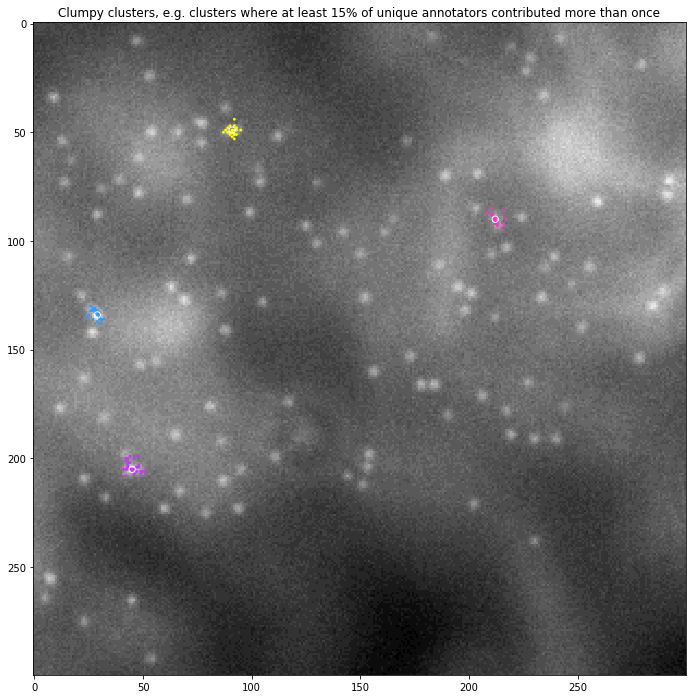

<Figure size 864x504 with 0 Axes>

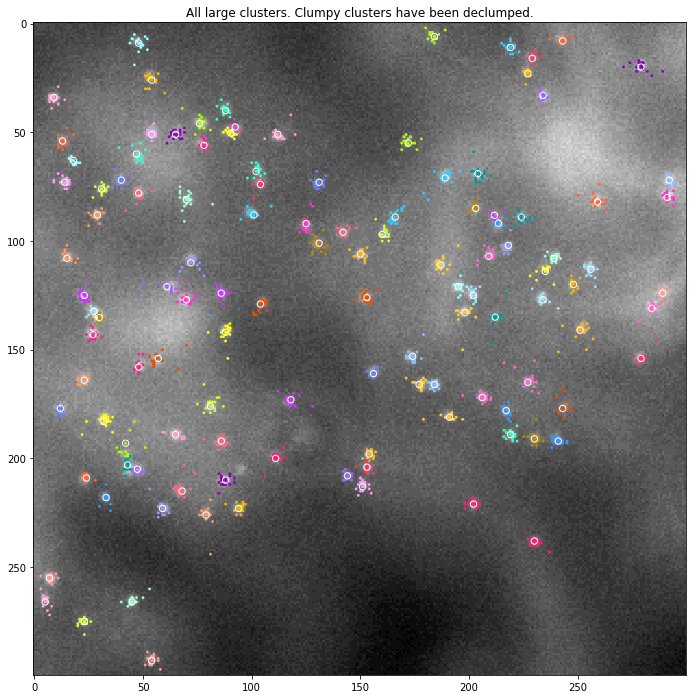

<Figure size 864x504 with 0 Axes>

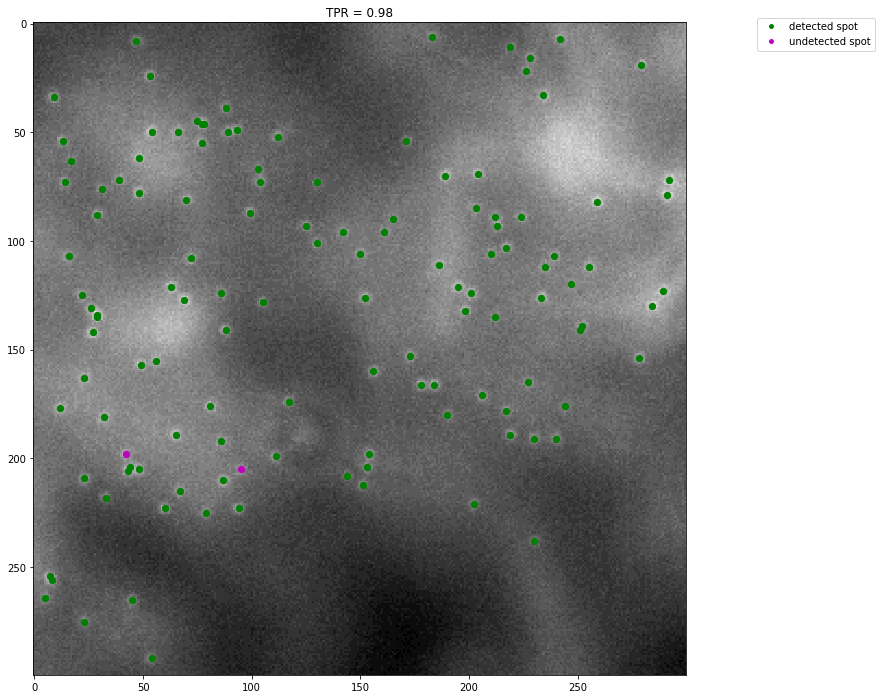

<Figure size 864x504 with 0 Axes>

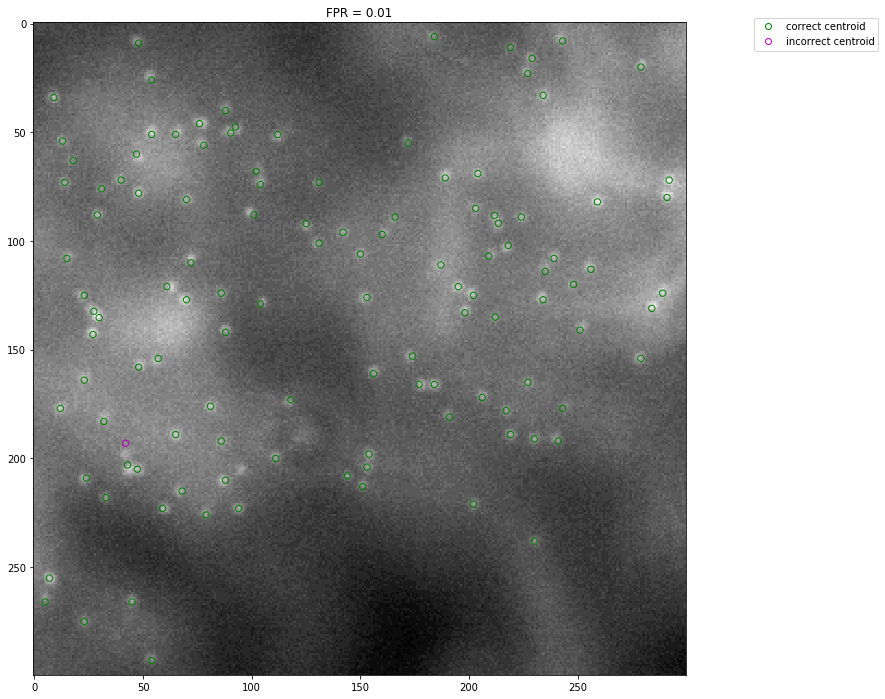

TPR: 0.98
FPR: 0.01
------------------------ snr_10_numspots_150_spot_img.png ------------------------


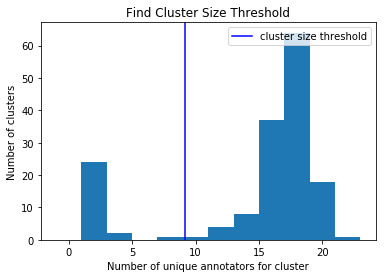

<Figure size 864x504 with 0 Axes>

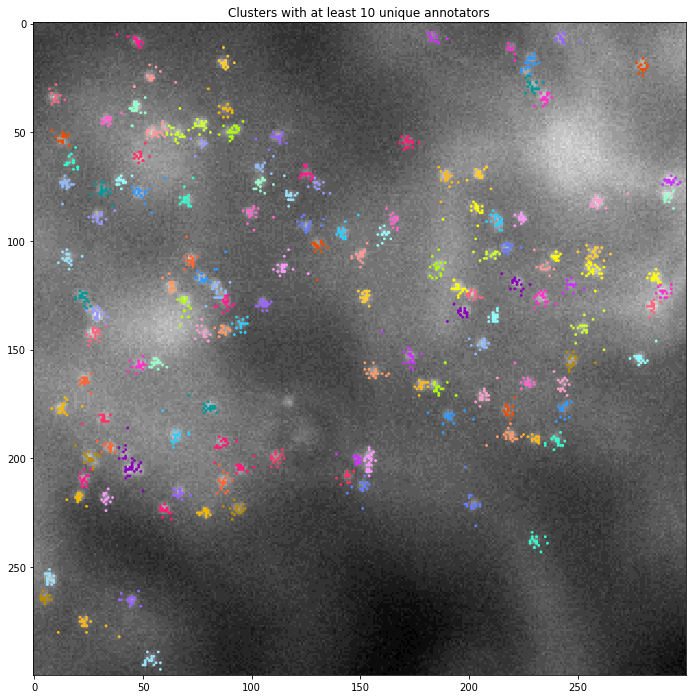

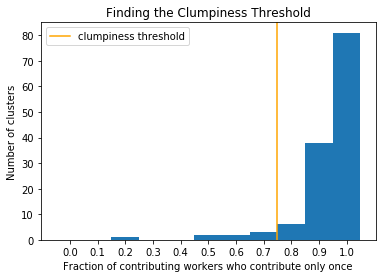

<Figure size 864x504 with 0 Axes>

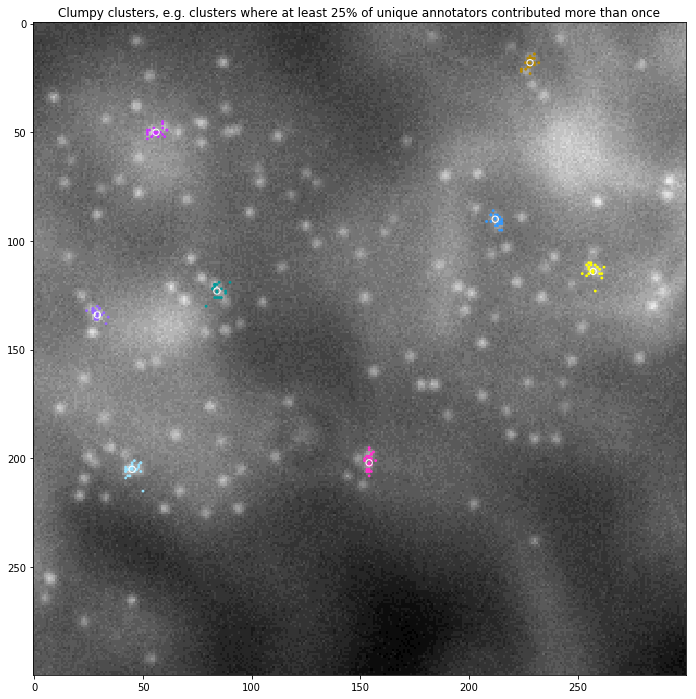

<Figure size 864x504 with 0 Axes>

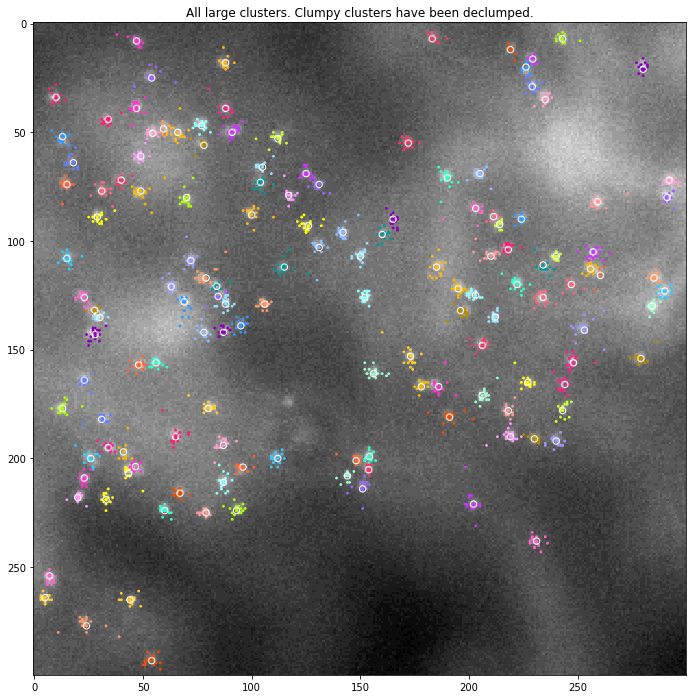

<Figure size 864x504 with 0 Axes>

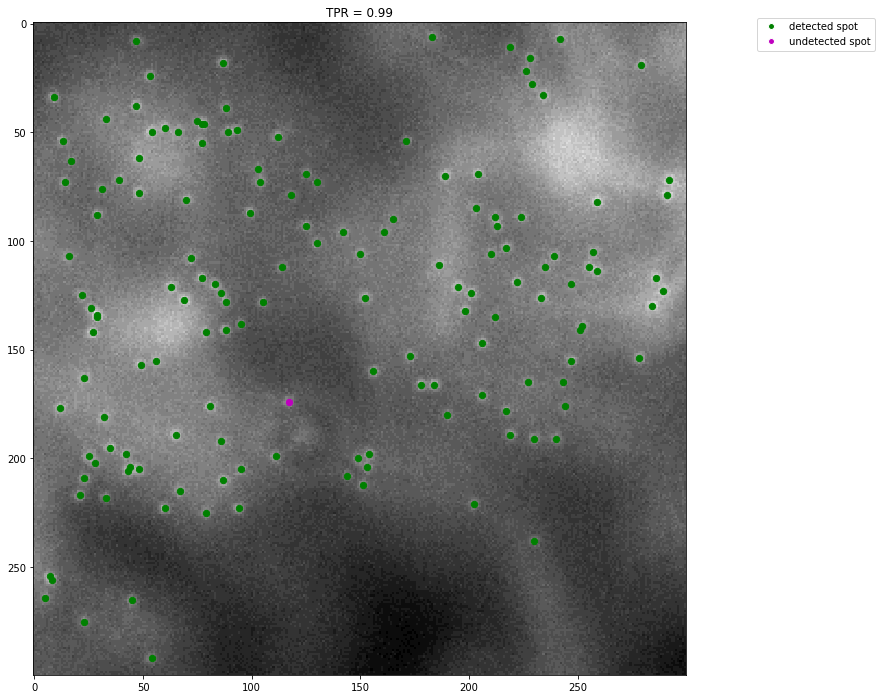

<Figure size 864x504 with 0 Axes>

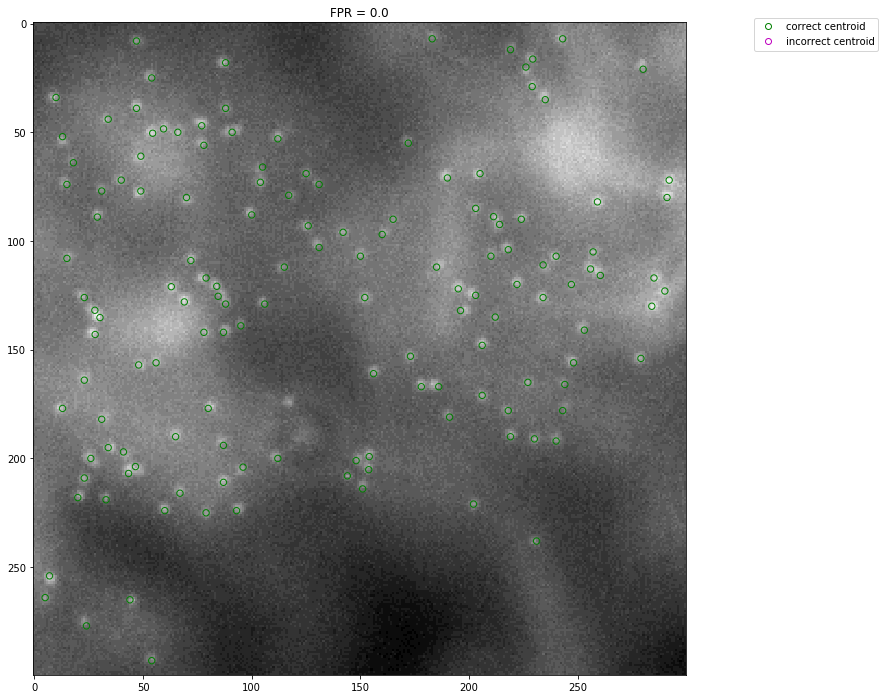

TPR: 0.99
FPR: 0.0
------------------------ snr_10_numspots_175_spot_img.png ------------------------


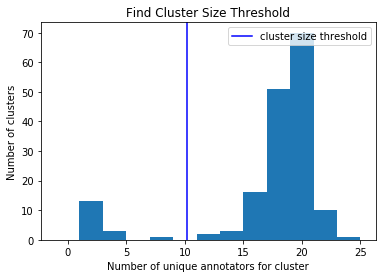

<Figure size 864x504 with 0 Axes>

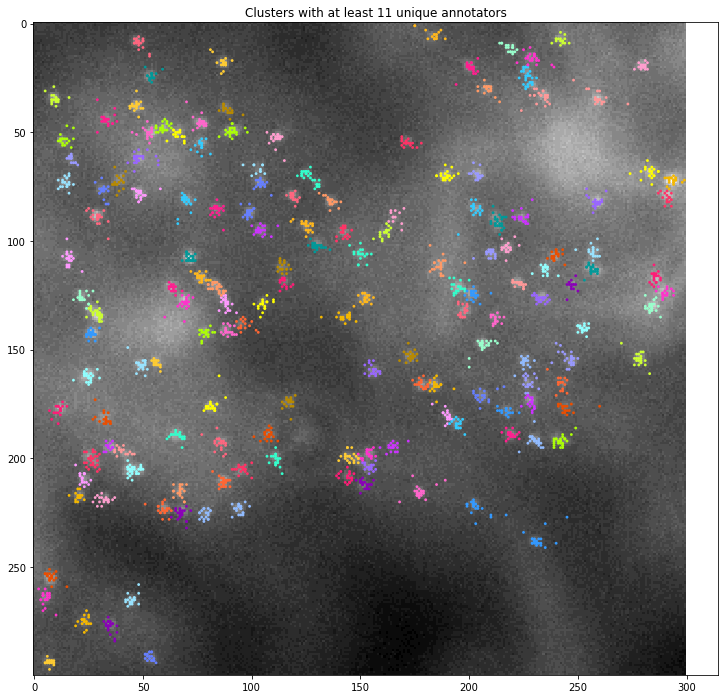

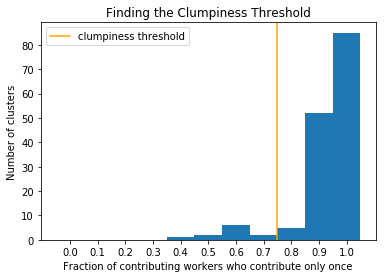

<Figure size 864x504 with 0 Axes>

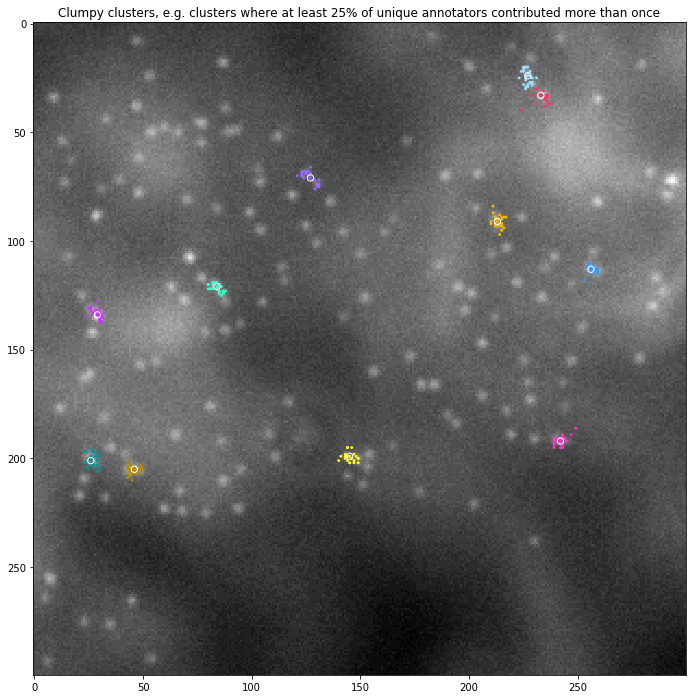

<Figure size 864x504 with 0 Axes>

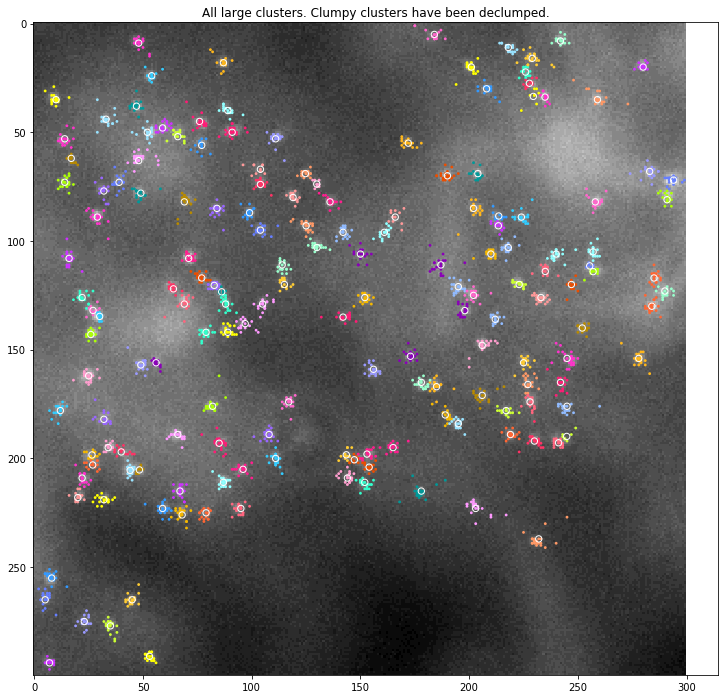

<Figure size 864x504 with 0 Axes>

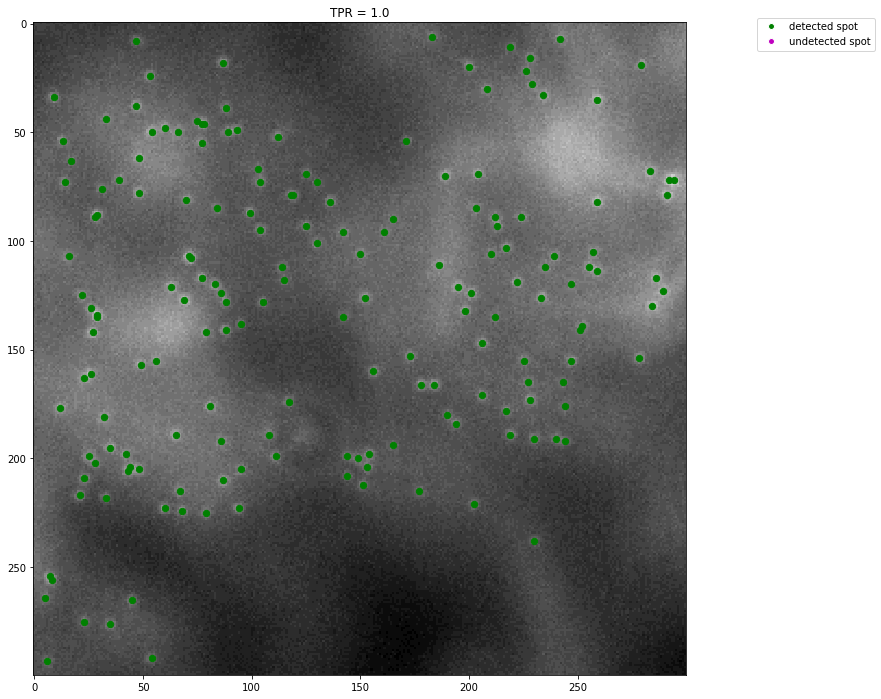

<Figure size 864x504 with 0 Axes>

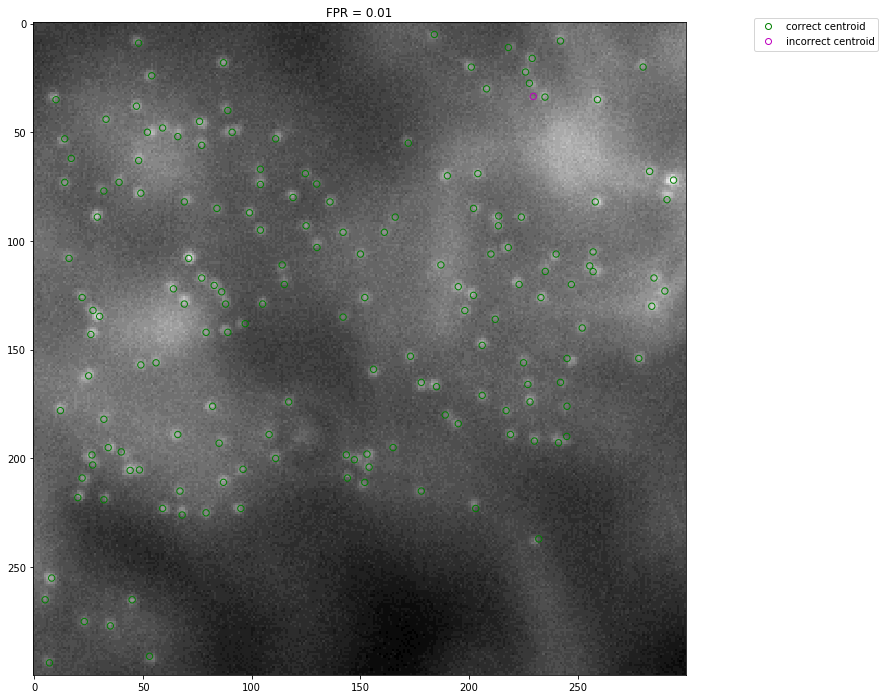

TPR: 1.0
FPR: 0.01
------------------------ snr_10_numspots_200_spot_img.png ------------------------


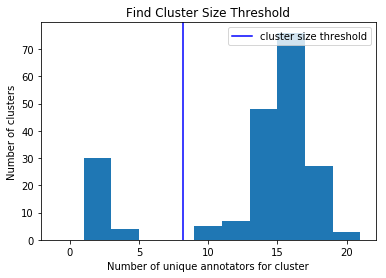

<Figure size 864x504 with 0 Axes>

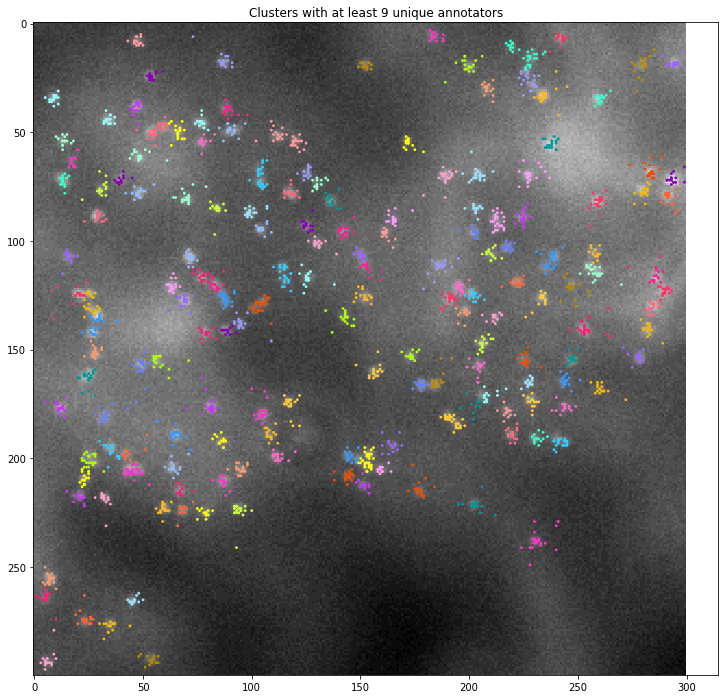

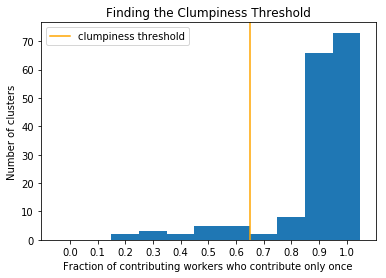

<Figure size 864x504 with 0 Axes>

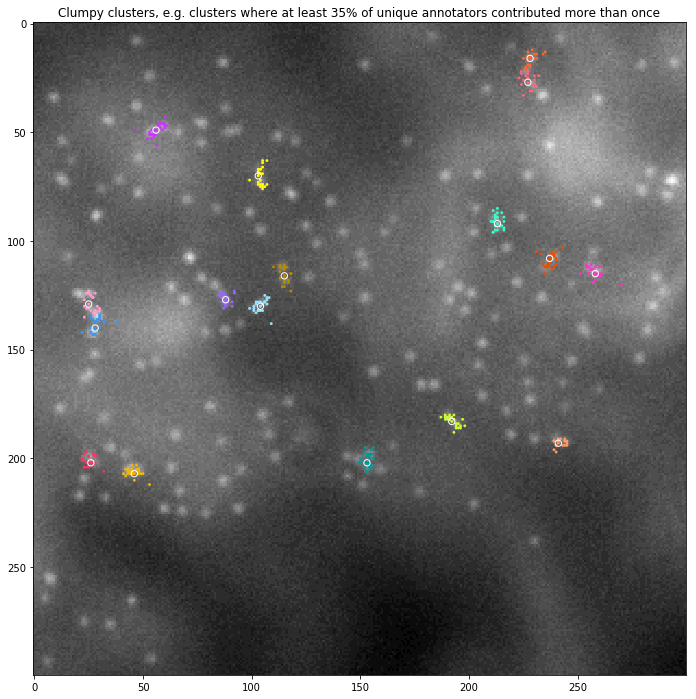

<Figure size 864x504 with 0 Axes>

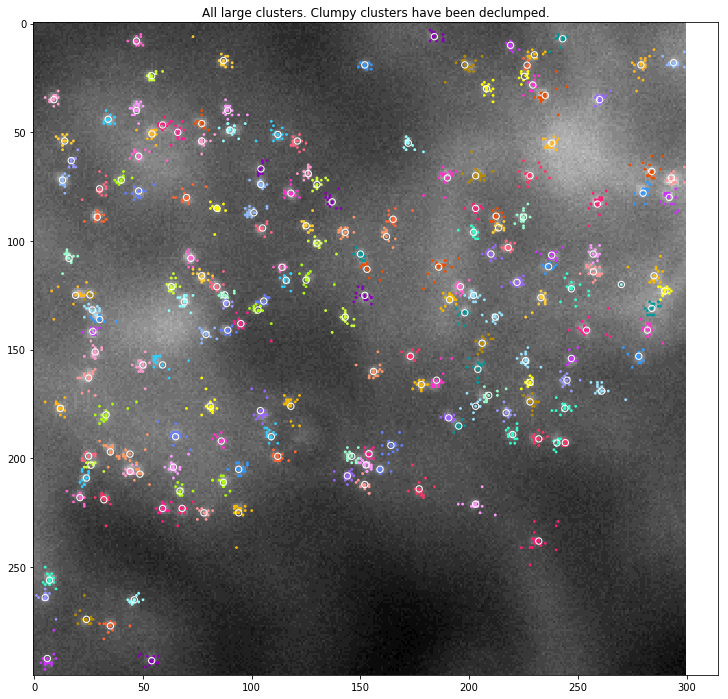

<Figure size 864x504 with 0 Axes>

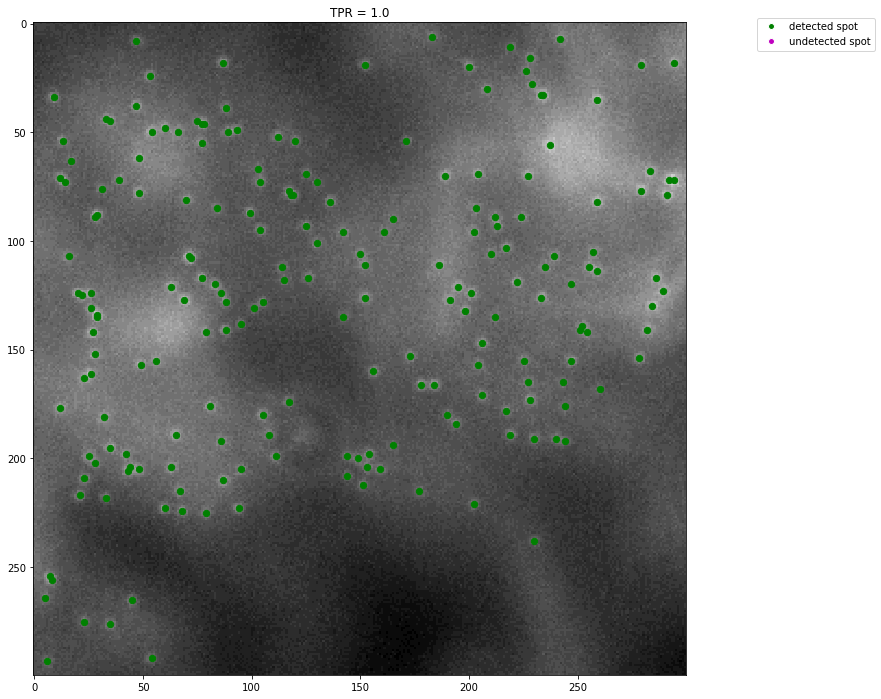

<Figure size 864x504 with 0 Axes>

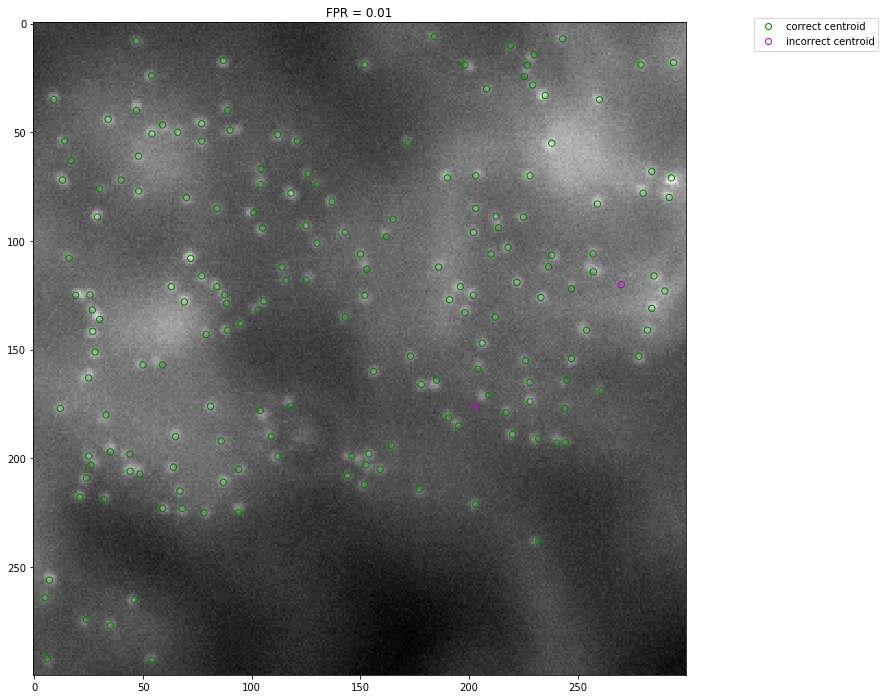

TPR: 1.0
FPR: 0.01
------------------------ snr_10_numspots_225_spot_img.png ------------------------


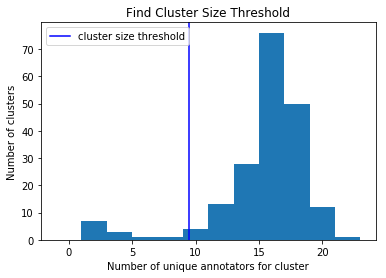

<Figure size 864x504 with 0 Axes>

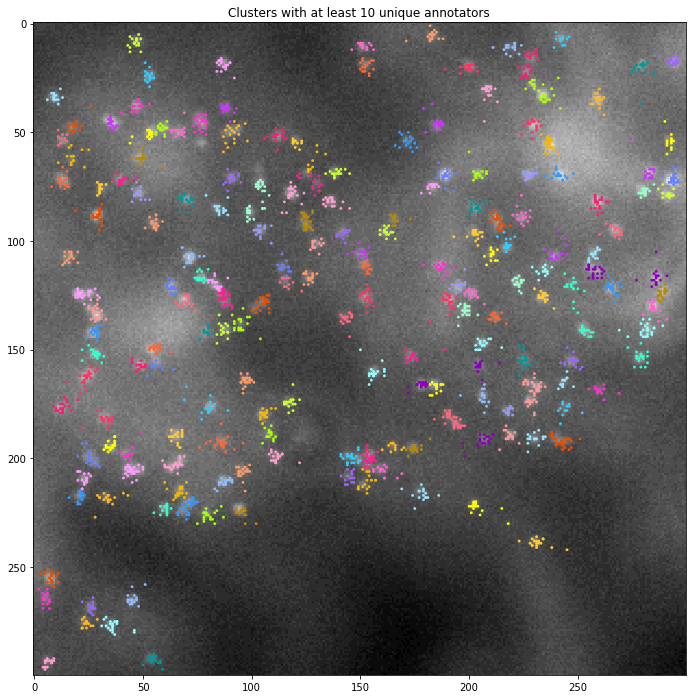

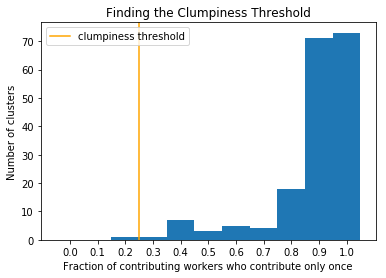

<Figure size 864x504 with 0 Axes>

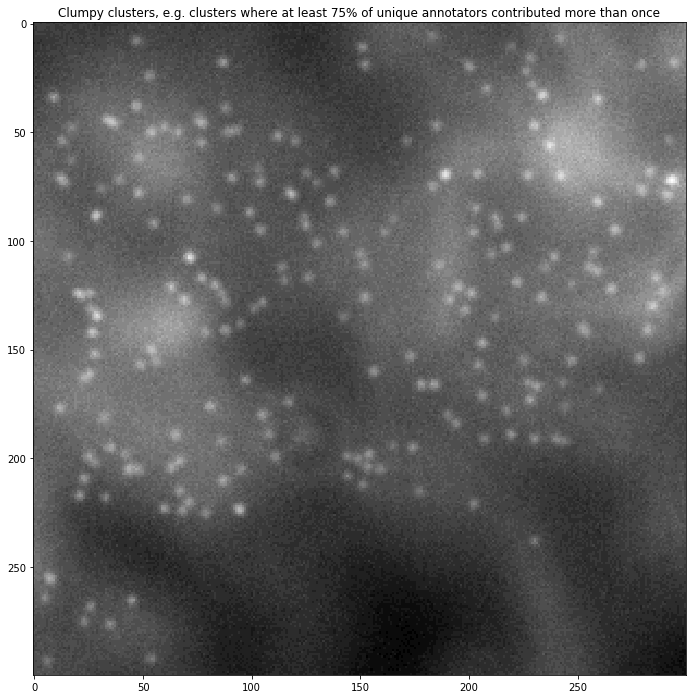

<Figure size 864x504 with 0 Axes>

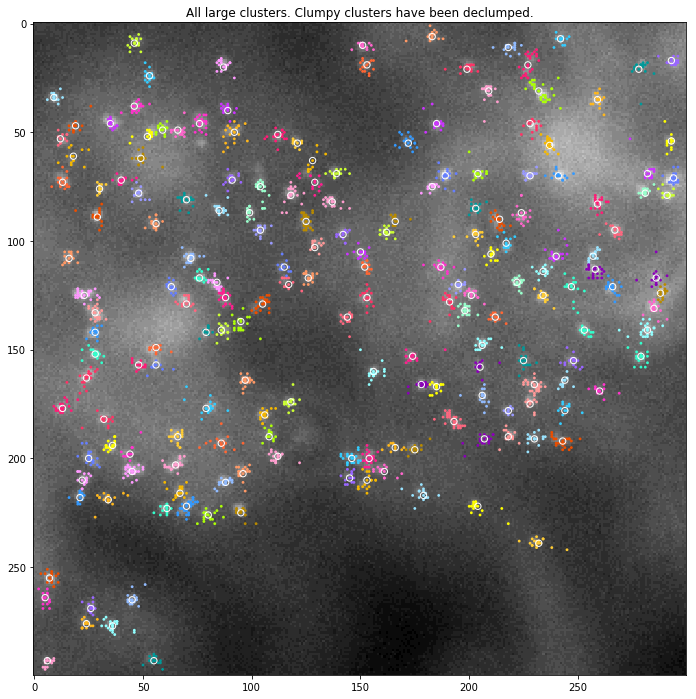

<Figure size 864x504 with 0 Axes>

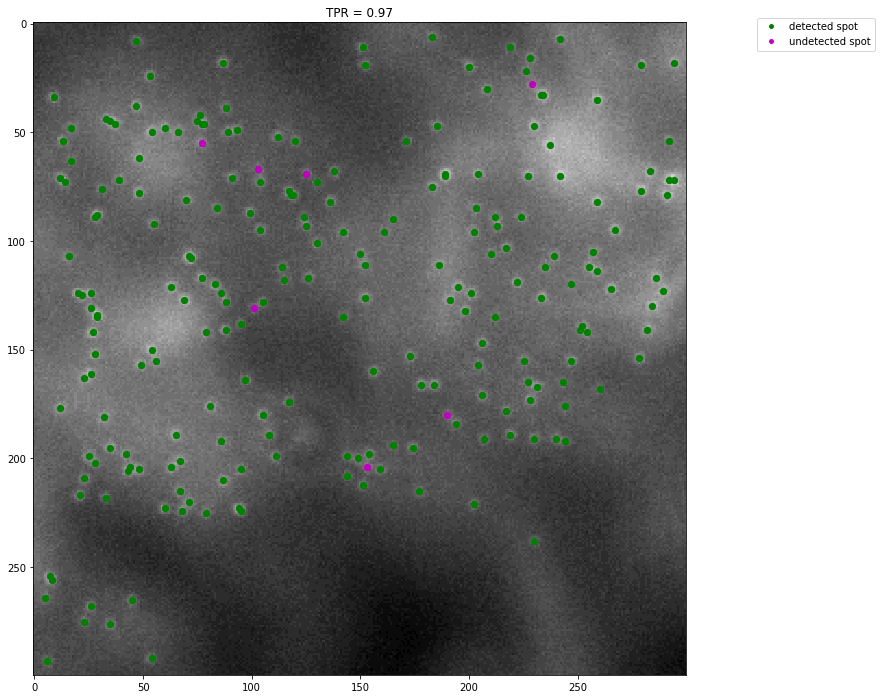

<Figure size 864x504 with 0 Axes>

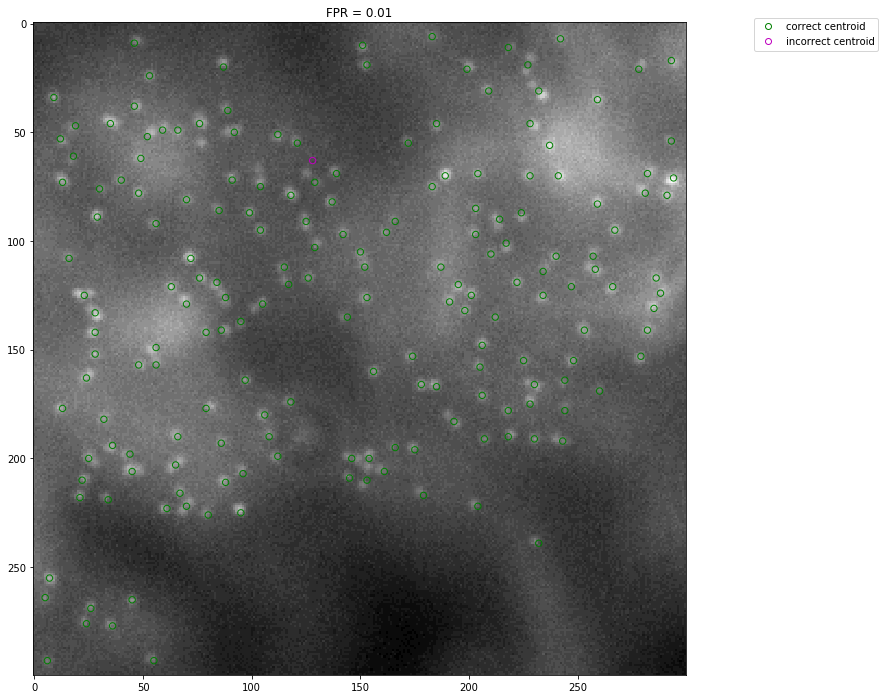

TPR: 0.97
FPR: 0.01


In [3]:
TPR_list, FPR_list = [], []
    
for num_spots in num_spots_list:
    json_filepath = cwd+ '/annotations/' + 'snr10_' + str(num_spots) + '.json'
    img_filename = 'snr_10_numspots_' + str(num_spots) + '_spot_img.png'
    print('------------------------ ' + img_filename + ' ------------------------')
    img_filepath = cwd + '/spot_images/' + img_filename
    csv_filepath = cwd + '/spot_data/' + 'snr_10_numspots_' + str(num_spots) + '_coord_snr_list.csv'
    qa = QuantiusAnnotation(json_filepath, img_filename)
    sa = SpotAnnotationAnalysis(qa)
    anno_all = qa.df()

    clustering_params = ['AffinityPropagation', -350]
    clusters = sa.get_clusters(anno_all, clustering_params)

    img_height = anno_all['height'].values[0]
    centroid_and_ref_df = util.centroid_and_ref_df(clusters, csv_filepath, img_height)
    
    show_workers = False
    show_correctness_workers = False
    show_centroids = False
    show_correctness_centroids = False
    show_ref_points = False
    show_NN_inc = False
    correctness_threshold = 4
    worker_marker_size = 8
    cluster_marker_size = 40
    ref_marker_size = None
    bigger_window_size = True

    """ Screen by Cluster Size """
    cluster_size_threshold = util.get_cluster_size_threshold(clusters)
    small_clusters, large_clusters = util.sort_clusters_by_size(clusters, cluster_size_threshold)
    util.plot_cluster_size_threshold(clusters, cluster_size_threshold)
    show_workers = True
    show_centroids = False
    plot_title = 'Clusters with at least ' + str(math.ceil(cluster_size_threshold)) + ' unique annotators'
    x_bounds, y_bounds, show_ref_points = None, None, False
    util.visualize_clusters(large_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)

    """ Detect Clumps """
    clumpiness_threshold = util.plot_clumpiness_threshold(large_clusters)
    clumpy_clusters, nonclumpy_clusters = util.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
    show_workers = True
    show_centroids = True
    plot_title = 'Clumpy clusters, e.g. clusters where at least ' + str(math.floor(100*(1-clumpiness_threshold))) + '% of unique annotators contributed more than once'
    util.visualize_clusters(clumpy_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)

    """ Declump """
    declumping_params = ['KMeans', 2]
    result_clusters = nonclumpy_clusters
    for i in range(len(clumpy_clusters.index)):
        subclusters = util.declump(clumpy_clusters, i, declumping_params)
        result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)
    plot_title = 'All large clusters. Clumpy clusters have been declumped.'
    util.visualize_clusters(result_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)

    """ FPR and TPR """

    plot_tpr, plot_fpr = True, False
    tpr, fpr = util.calc_fpr_tpr(result_clusters, csv_filepath, correctness_threshold, plot_tpr, plot_fpr, img_filepath, img_height, cluster_marker_size, bigger_window_size)
    plot_tpr, plot_fpr = False, True
    tpr, fpr = util.calc_fpr_tpr(result_clusters, csv_filepath, correctness_threshold, plot_tpr, plot_fpr, img_filepath, img_height, cluster_marker_size, bigger_window_size)
    print('TPR: ' + str(round(tpr, 2)))
    print('FPR: ' + str(round(fpr, 2)))
    
    TPR_list.append(tpr)
    FPR_list.append(fpr)


In [4]:
sensitivity = TPR_list
specificity = [(1 - x) for x in FPR_list]

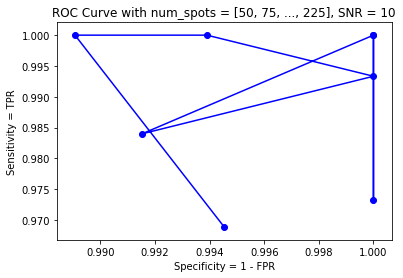

num spots
[ 50  75 100 125 150 175 200 225]
TPR
[1.0, 0.97, 1.0, 0.98, 0.99, 1.0, 1.0, 0.97]
FPR
[0.0, 0.0, 0.0, 0.01, 0.0, 0.01, 0.01, 0.01]


In [5]:
import matplotlib.pyplot as plt
plt.plot(specificity, sensitivity, color='blue')
plt.scatter(specificity, sensitivity, c='blue')
plt.title('ROC Curve with num_spots = [50, 75, ..., 225], SNR = 10')
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.show()
print('num spots')
print(num_spots_list)
print('TPR')
print ([round(i, 2) for i in TPR_list])
print('FPR')
print ([round(i, 2) for i in FPR_list])

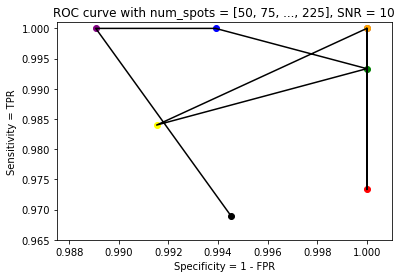

num spots
[ 50  75 100 125 150 175 200 225]
TPR
[1.0, 0.97, 1.0, 0.98, 0.99, 1.0, 1.0, 0.97]
FPR
[0.0, 0.0, 0.0, 0.01, 0.0, 0.01, 0.01, 0.01]


In [6]:
import matplotlib.pyplot as plt
colors = ('brown','red','orange','yellow','green','blue','purple','black')
for spec, sen, col in zip(specificity, sensitivity, colors):
    plt.scatter(spec, sen, c=col)
plt.plot(specificity, sensitivity, color='black')
plt.title('ROC curve with num_spots = [50, 75, ..., 225], SNR = 10')
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.xlim(0.9875, 1.001)
plt.ylim(0.965, 1.001)
plt.show()
print('num spots')
print(num_spots_list)
print('TPR')
print ([round(i, 2) for i in TPR_list])
print('FPR')
print ([round(i, 2) for i in FPR_list])